In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [22]:
data=pd.read_csv('./OneHot_Encoding.csv')

In [23]:
data

,stops,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,airline_Air India,airline_AirAsia,...,departure_category_Evening,departure_category_Late Night,departure_category_Morning,departure_category_Night,arrival_category_Afternoon,arrival_category_Early Morning,arrival_category_Evening,arrival_category_Late Night,arrival_category_Morning,arrival_category_Night
0,0.0,130.0,1.0,5953.0,-1.000000,-1.836970e-16,-7.071068e-01,7.071068e-01,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,140.0,1.0,5953.0,1.000000,6.123234e-17,8.660254e-01,-5.000000e-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,130.0,1.0,5956.0,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,135.0,1.0,5955.0,0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,140.0,1.0,5955.0,0.866025,-5.000000e-01,2.588190e-01,-9.659258e-01,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299732,1.0,1045.0,43.0,51345.0,1.000000,6.123234e-17,-2.588190e-01,9.659258e-01,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299733,1.0,1050.0,43.0,51345.0,-0.965926,-2.588190e-01,5.000000e-01,-8.660254e-01,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299734,1.0,1380.0,43.0,51345.0,-0.866025,5.000000e-01,-9.659258e-01,2.588190e-01,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299735,1.0,610.0,43.0,66779.0,0.500000,-8.660254e-01,-8.660254e-01,5.000000e-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
economy_data = data[data['class_economy'] == 1].drop(['class_business', 'class_economy'], axis=1)
business_data = data[data['class_business'] == 1].drop(['class_economy', 'class_business'], axis=1)
print(economy_data.shape)
print(business_data.shape)

(206512, 50)
(93225, 50)
Index(['stops', 'duration', 'days_left', 'price', 'departure_hour_sin',
       'departure_hour_cos', 'arrival_hour_sin', 'arrival_hour_cos',
       'airline_Air India', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed', 'departure_category_Afternoon',
       'departure_category_E

In [29]:
# Preprocess X and y(target) values
X_economy = economy_data.drop(['price'], axis=1)
y_economy = economy_data['price']

X_business = business_data.drop(['price'], axis=1)
y_business = business_data['price']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the economy data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Training the model for economy class
model_economy = LinearRegression()
model_economy.fit(X_train_economy, y_train_economy)

# Predicting and evaluating for economy class
predictions_economy = model_economy.predict(X_test_economy)
rmse_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_economy))
print(f'Economy class RMSE: {rmse_economy}')


# Splitting the business data
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Training the model for business class
model_business = LinearRegression()
model_business.fit(X_train_business, y_train_business)

# Predicting and evaluating for business class
predictions_business = model_business.predict(X_test_business)
rmse_business = np.sqrt(mean_squared_error(y_test_business, predictions_business))
print(f'business class RMSE: {rmse_business}')

Economy class RMSE: 43.83998331097474
business class RMSE: 37.61252466216439


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_price_economy = y_train_economy.mean()
predictions_baseline_economy = [mean_price_economy] * len(y_test_economy)
rmse_baseline_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_baseline_economy))
print(f"Economy Baseline Model RMSE: {rmse_baseline_economy}")


mean_price_business = y_train_business.mean()
predictions_baseline_business = [mean_price_business] * len(y_test_business)
rmse_baseline_business = np.sqrt(mean_squared_error(y_test_business, predictions_baseline_business))
print(f"Business Baseline Model RMSE: {rmse_baseline_business}")


Economy Baseline Model RMSE: 3715.9056068269642
Business Baseline Model RMSE: 12872.106061969818


In [32]:
print(f"Economy Mean Price: {y_train_economy.mean()}, Std Dev of Price: {y_train_economy.std()}")
print(f"Business Mean Price: {y_train_business.mean()}, Std Dev of Price: {y_train_business.std()}")


Economy Mean Price: 6575.96357946601, Std Dev of Price: 3751.2258347686056
Business Mean Price: 52531.07727272727, Std Dev of Price: 12989.825002172487


In [33]:
from sklearn.model_selection import cross_val_score

scores_economy = cross_val_score(model_economy, X_economy, y_economy, cv=5, scoring='neg_mean_squared_error')
rmse_scores_economy = np.sqrt(-scores_economy)
print(f"Cross-Validation RMSE: {rmse_scores_economy.mean()}")

scores_business = cross_val_score(model_business, X_business, y_business, cv=5, scoring='neg_mean_squared_error')
rmse_scores_business = np.sqrt(-scores_business)
print(f"Cross-Validation RMSE: {rmse_scores_business.mean()}")

Cross-Validation RMSE: 51.05743434592667
Cross-Validation RMSE: 45.4946356311488


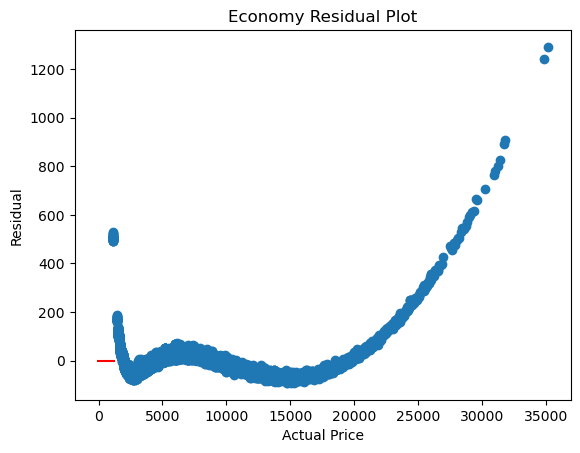

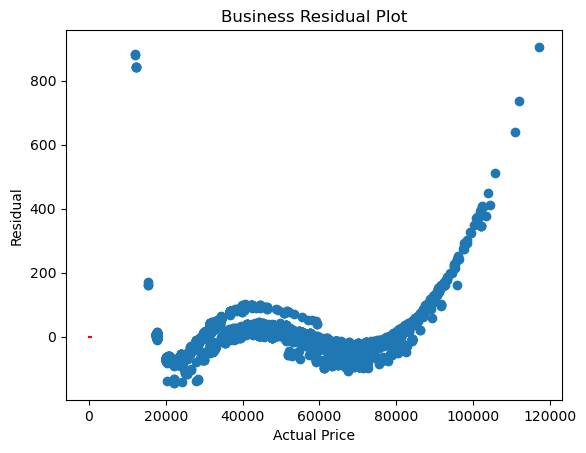

In [34]:
residuals_economy = y_test_economy - predictions_economy
plt.scatter(y_test_economy, residuals_economy)
plt.hlines(y=0, xmin=residuals_economy.min(), xmax=residuals_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot')
plt.show()

residuals_business = y_test_business - predictions_business
plt.scatter(y_test_business, residuals_business)
plt.hlines(y=0, xmin=residuals_business.min(), xmax=residuals_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot')
plt.show()


In [35]:
import numpy as np

# Apply log transformation
y_train_economy_log = np.log(y_train_economy)
y_test_economy_log = np.log(y_test_economy)

# Retrain the model on the transformed target variable
model_economy_log = LinearRegression()
model_economy_log.fit(X_train_economy, y_train_economy_log)

# Predict on the test set and transform predictions back to the original scale
predictions_economy_log = model_economy_log.predict(X_test_economy)
predictions_economy_log = np.exp(predictions_economy_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_economy_log = np.sqrt(mean_squared_error(y_test_economy, predictions_economy_log))
print(f"Economy class RMSE after log transformation: {rmse_economy_log}")


# Apply log transformation
y_train_business_log = np.log(y_train_business)
y_test_business_log = np.log(y_test_business)

# Retrain the model on the transformed target variable
model_business_log = LinearRegression()
model_business_log.fit(X_train_business, y_train_business_log)

# Predict on the test set and transform predictions back to the original scale
predictions_business_log = model_business_log.predict(X_test_business)
predictions_business_log = np.exp(predictions_business_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_business_log = np.sqrt(mean_squared_error(y_test_business, predictions_business_log))
print(f"business class RMSE after log transformation: {rmse_business_log}")


Economy class RMSE after log transformation: 1.3582757216485273e-10
business class RMSE after log transformation: 2.492795861946835e-10


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_economy, y_train_economy,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Economy Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_business, y_train_business,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Business Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


Economy Average RMSE (log-transformed target) with 5-Fold CV: 0.0345483116618205
Business Average RMSE (log-transformed target) with 5-Fold CV: 0.0029267476997555607


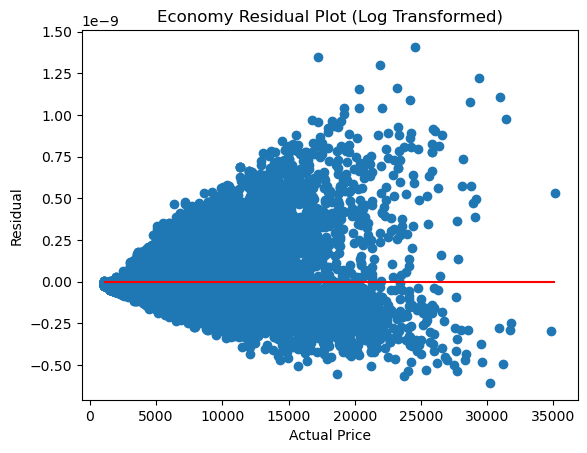

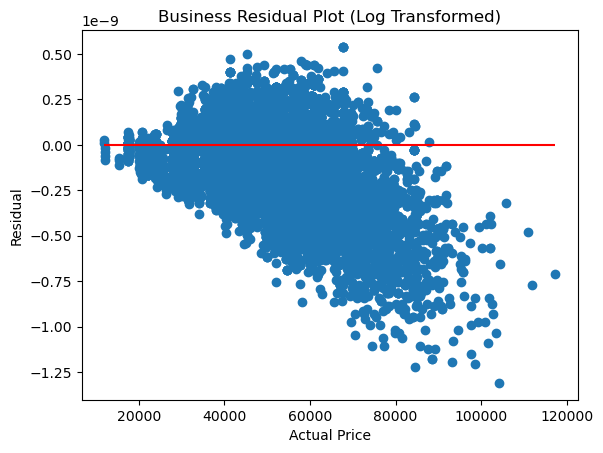

In [37]:
# Calculate residuals for the transformed predictions
residuals_economy_log = y_test_economy - predictions_economy_log

# Plot residuals for economy class
plt.scatter(y_test_economy, residuals_economy_log)
plt.hlines(y=0, xmin=y_test_economy.min(), xmax=y_test_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot (Log Transformed)')
plt.show()

# Calculate residuals for the transformed predictions
residuals_business_log = y_test_business - predictions_business_log

# Plot residuals for business class
plt.scatter(y_test_business, residuals_business_log)
plt.hlines(y=0, xmin=y_test_business.min(), xmax=y_test_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot (Log Transformed)')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to train regression models with cross-validation and visualize performance
def train_and_evaluate_models_cv(X, y, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Convert scores to positive and calculate RMSE
    rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE for {model_name}: {rmse_scores}")
    print(f"Average Cross-Validation RMSE for {model_name}: {np.mean(rmse_scores)}")

# Split the data into features and target variable for economy_data
X_economy = economy_data.drop('price', axis=1)
y_economy = economy_data['price']

# Split the data into training and testing sets for economy_data
# X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)  
# Train and evaluate models with cross-validation for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_economy, y_economy, model_name)

    
# Repeat the same process for business_data
X_business = business_data.drop('price', axis=1)
y_business = business_data['price']

# X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
# Repeat for business_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_business, y_business, model_name)
    
########### Results #############
# Economy_data:
# Cross-Validation RMSE for Random Forest: [ 2.93350618  2.44366533  8.17549656  1.7382688  53.88006777]
# Average Cross-Validation RMSE for Random Forest: 13.834200928890947
# Cross-Validation RMSE for Gradient Boost: [34.41462148 37.29978267 39.29048677 36.28000115 63.57212794]
# Average Cross-Validation RMSE for Gradient Boost: 42.171404001648305
# Cross-Validation RMSE for XGBoost: [254.54582923 202.91669727 255.93708435 152.80789351 286.73013875]
# Average Cross-Validation RMSE for XGBoost: 230.58752862023925
# 
# Business_data:
# Cross-Validation RMSE for Random Forest: [57.89793691 31.96830555 66.03512886 77.82735742 54.24634074]
# Average Cross-Validation RMSE for Random Forest: 57.595013896062554
# Cross-Validation RMSE for Gradient Boost: [144.18035482 135.1320529  115.69052454 148.30509121 147.21641316]
# Average Cross-Validation RMSE for Gradient Boost: 138.1048873241138
# Cross-Validation RMSE for XGBoost: [584.1354788  637.4125226  420.05944718 623.50499185 603.27976376]
# Average Cross-Validation RMSE for XGBoost: 573.6784408383371


Cross-Validation RMSE for Random Forest: [ 2.44612261  2.25555928  8.1028422   2.03156291 53.55437053]
Average Cross-Validation RMSE for Random Forest: 13.678091506837877
Cross-Validation RMSE for Gradient Boost: [34.85979103 37.19678787 39.9004169  36.07631992 63.61570988]
Average Cross-Validation RMSE for Gradient Boost: 42.329805120449464
Cross-Validation RMSE for XGBoost: [231.6327583  248.56870339 209.97125982 153.33542181 286.75104354]
Average Cross-Validation RMSE for XGBoost: 226.05183737194164
Cross-Validation RMSE for Random Forest: [66.0332981  33.44548284 61.4244565  94.39005935 43.44830987]
Average Cross-Validation RMSE for Random Forest: 59.74832133128249
Cross-Validation RMSE for Gradient Boost: [140.23658807 132.62425864 119.92174791 155.70270995 146.82577961]
Average Cross-Validation RMSE for Gradient Boost: 139.06221683561844
Cross-Validation RMSE for XGBoost: [502.36279919 643.17678454 430.61896173 647.02761566 599.42765945]
Average Cross-Validation RMSE for XGBoost: